In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
init_notebook_mode(connected=True)

In [120]:
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)

In [72]:
df.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93


In [121]:
X = df.iloc[:, 3:-1]
X['Country/Territory'] = df['Country/Territory']
X = X.drop(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'CL', 'PR', 'Add Q', 'Add A', 'PR rating', 'CL rating'], axis=1)
# X = X.to_numpy()
X
X_train = X[X['Country/Territory'] < 'R'] 
X_train = X_train[X_train['Edition'] <= 2019]
X_test = X[X['Country/Territory'] >= 'R'] 
X_test = X_test[X_test['Edition'] > 2019]


In [122]:
X_test

,Edition,Status,A1,A2,A3,B1,B2,B3,B4,C1,...,E3,F1,F2,F3,F4,G1,G2,G3,G4,Country/Territory
149,2022,F,4,4,4,4,4,3,3,4,...,3,3,3,3,3,4,2,3,3,Romania
150,2022,NF,0,0,0,1,0,1,1,0,...,2,1,1,0,0,2,1,2,2,Russia
151,2022,NF,0,1,1,1,0,0,1,1,...,1,0,1,0,1,2,2,2,1,Rwanda
152,2022,F,3,3,3,4,4,3,3,3,...,4,4,3,4,3,3,3,3,3,Samoa
153,2022,F,4,4,4,4,4,4,3,4,...,4,3,3,4,3,4,4,3,4,San Marino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2020,NF,0,0,1,1,0,1,2,0,...,2,2,1,0,1,1,1,2,1,West Bank
626,2020,NF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,0,Western Sahara
627,2020,NF,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,1,0,Yemen
628,2020,PF,2,2,2,2,2,3,3,2,...,3,2,2,2,2,3,2,2,1,Zambia


In [123]:
X_train

,Edition,Status,A1,A2,A3,B1,B2,B3,B4,C1,...,E3,F1,F2,F3,F4,G1,G2,G3,G4,Country/Territory
630,2019,PF,3,2,1,2,3,2,1,1,...,1,1,1,1,1,1,1,2,1,Abkhazia
631,2019,NF,1,1,1,2,2,1,2,1,...,1,1,0,0,1,0,1,0,1,Afghanistan
632,2019,PF,3,3,2,3,4,3,3,3,...,2,2,2,2,3,3,2,2,2,Albania
633,2019,NF,1,1,1,1,1,1,1,1,...,1,1,1,2,2,2,2,2,1,Algeria
634,2019,F,4,4,4,4,4,4,3,4,...,3,4,4,4,3,4,4,3,4,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,2013,PF,3,3,3,2,3,2,3,3,...,3,2,1,1,1,3,2,3,2,Philippines
2030,2013,F,4,4,4,4,4,4,4,4,...,4,3,3,4,3,4,4,3,3,Poland
2031,2013,F,4,4,4,4,4,4,4,4,...,4,4,4,3,4,4,4,4,3,Portugal
2032,2013,F,4,4,4,4,4,3,4,3,...,3,3,4,2,3,4,4,3,3,Puerto Rico


In [124]:
y_train = X_train.loc[:,"Status"]
y_test = X_test.loc[:,"Status"]

In [131]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,  random_state = 1)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# X_pred = X_test.iloc[: , -1]


X_test = X_test.iloc[:, 2:-1]
X_train = X_train.iloc[:, 2:-1]
# X_train = X_train.drop(['Country/Territory'], axis=1)

X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

In [94]:
X_test

array([[3, 3, 3, ..., 3, 3, 3],
       [4, 4, 4, ..., 4, 3, 4],
       [4, 4, 3, ..., 3, 2, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [2, 2, 2, ..., 2, 2, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [126]:
y_test

149     F
150    NF
151    NF
152     F
153     F
       ..
625    NF
626    NF
627    NF
628    PF
629    PF
Name: Status, Length: 183, dtype: object

In [127]:
y_train

630     PF
631     NF
632     PF
633     NF
634      F
        ..
2029    PF
2030     F
2031     F
2032     F
2033    NF
Name: Status, Length: 1038, dtype: object

In [108]:
X_train

array([[2, 2, 1, ..., 1, 2, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [3, 3, 2, ..., 2, 2, 2],
       ...,
       [3, 4, 3, ..., 2, 3, 3],
       [0, 1, 0, ..., 1, 2, 2],
       [0, 1, 1, ..., 2, 2, 1]], dtype=int64)

In [128]:
# dummy = DummyClassifier()
# dummy.fit(X_train, y_train)
# y_pred = dummy.predict(X_test)

# print("Baseline Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))

learner = SVC(kernel = 'linear',gamma='auto')
learner.fit(X_train, y_train)
y_pred = learner.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM Accuracy: 0.9617486338797814


In [129]:
y_pred

array(['F', 'NF', 'NF', 'F', 'F', 'F', 'NF', 'PF', 'PF', 'F', 'PF', 'PF',
       'F', 'F', 'F', 'NF', 'PF', 'F', 'F', 'NF', 'NF', 'F', 'PF', 'F',
       'F', 'F', 'NF', 'F', 'F', 'F', 'NF', 'F', 'NF', 'NF', 'NF', 'PF',
       'NF', 'F', 'PF', 'F', 'NF', 'F', 'PF', 'NF', 'NF', 'F', 'NF', 'PF',
       'NF', 'F', 'F', 'F', 'NF', 'F', 'NF', 'NF', 'NF', 'NF', 'NF', 'PF',
       'NF', 'F', 'NF', 'NF', 'F', 'F', 'F', 'NF', 'F', 'PF', 'F', 'PF',
       'PF', 'F', 'F', 'F', 'NF', 'PF', 'F', 'F', 'NF', 'NF', 'F', 'PF',
       'F', 'F', 'F', 'NF', 'F', 'F', 'F', 'NF', 'F', 'NF', 'NF', 'NF',
       'PF', 'NF', 'F', 'PF', 'F', 'NF', 'F', 'F', 'NF', 'NF', 'F', 'NF',
       'PF', 'NF', 'F', 'F', 'F', 'NF', 'F', 'NF', 'NF', 'NF', 'NF', 'NF',
       'PF', 'NF', 'F', 'NF', 'NF', 'F', 'F', 'F', 'NF', 'F', 'PF', 'F',
       'PF', 'PF', 'F', 'F', 'F', 'NF', 'PF', 'F', 'F', 'NF', 'NF', 'F',
       'PF', 'F', 'F', 'F', 'NF', 'F', 'F', 'F', 'NF', 'F', 'NF', 'PF',
       'NF', 'PF', 'NF', 'F', 'PF', 'F', 'NF',

In [132]:
learner = KNeighborsClassifier()

learner.fit(X_train, y_train)
y_pred = learner.predict(X_test)

print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))

KNN Accuracy: 0.9453551912568307


In [107]:
def plotPredictions(X_pred, y_pred):
    fig = px.choropleth(locations=X_pred,
     locationmode="country names",
    color=y_pred,
     title="Wide-Form Input, relabelled",
    labels={"color": "Election Type"}
     )
    fig.show()
    
plotPredictions(X_pred, y_pred)

NameError: name 'X_pred' is not defined

In [42]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[222,   0,   2],
       [  0, 146,   5],
       [  0,   3, 146]], dtype=int64)

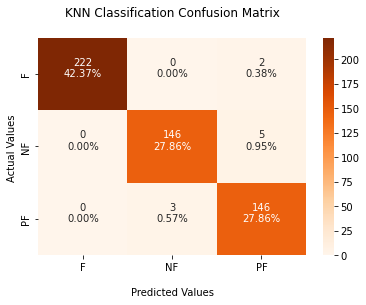

In [44]:
import seaborn as sns


group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')



# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

ax.set_title('KNN Classification Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['F','NF', 'PF'])
ax.yaxis.set_ticklabels(['F','NF', 'PF'])

## Display the visualization of the Confusion Matrix.
plt.show()